In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("data/Ecoli_LCC.txt", sep='\t')

In [37]:
df = df.drop(['Regulation Type'],axis=1)

In [38]:
df.head()

,Regulator,Target
0,acrR,acrR
1,acrR,acrA
2,acrR,acrB
3,acrR,micF
4,ada,alkA


In [39]:
G = nx.from_pandas_edgelist(df, 'Regulator', 'Target', create_using=nx.DiGraph())

In [40]:
print(G.is_directed(), len(G.nodes), len(G.edges()))

True 1464 3447


In [41]:
# deleting self-loop edges
for n, nbrs in G.adj.items():
    if n in nbrs:
        G.remove_edge(n,n)

In [42]:
print(G.is_directed(), len(G.nodes), len(G.edges()))

True 1464 3362


### pattern 1 search

In [100]:
node_set = set() # to save the node list
for node1 in G.nodes:
    for node2 in G.neighbors(node1):
        if (G.out_degree(node2)>1 or G.out_degree(node2)>1 or node2==node1):
            continue
        else:
            for node3 in G.neighbors(node2):
                if(node3 not in [node1, node2] and (node3 not in G.neighbors(node1))): 
                    print(node1, node2, node3)
                    node_set.add(node1); node_set.add(node2); node_set.add(node3);

crp feaR feaB
marA putA putP


### Plotting

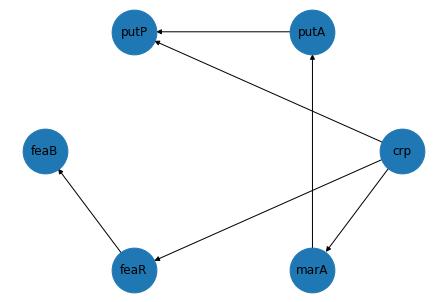

In [102]:
H = G.subgraph(list(node_set))
pos = nx.circular_layout(H)
nx.draw(H, pos, cmap = plt.get_cmap('jet'), node_size = 2000)
nx.draw_networkx_labels(H, pos)
plt.show()

### pattern 2 search

In [60]:
# pattern 2 search
for node1 in G.nodes:
    for node2 in G.neighbors(node1):
        if (G.out_degree(node2)>1 or G.out_degree(node2)>1 or node2==node1):
            continue
        else:
            for node3 in G.neighbors(node2):
                if (G.out_degree(node3)>1 or G.out_degree(node3)>1 or node3 in [node1, node2]):
                    continue
                else:
                    for node4 in G.neighbors(node3):
                        if (G.out_degree(node4)>1 or G.out_degree(node4)>1 or node4 in [node1, node2, node3]):
                            continue
                        else:
                            for node5 in G.neighbors(node4):
                                print(node1, node2, node3, node4, node5)                            

Comment: No pattern 2 path found